In [54]:
# 데이터 분석
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 군집화
from sklearn.model_selection import train_test_split            # train / test 데이터셋 분리
from sklearn.decomposition import PCA                           # 차원 축소
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # for 표준화, 정규화 
from sklearn.cluster import KMeans                              # 비지도 학습 - 클러스터링 ; Kmeans

# csv 파일 저장
import csv
import time
import datetime

In [ ]:
file_path = "/content/drive/Othercomputers/내 노트북/Project/Models/Music_Genre_Classification_Recommendation/Feature_Result_csv/20220326-141916.csv"                       # 피처값 csv 파일 경로

df_soundwave = pd.read_csv(file_path, index_col=0)                      # classic 장르 피처값 csv 읽기
df_soundwave.head()

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_18_std,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo
0,blues.00000.wav,4031.364538,1027.079258,1784.420446,360.263361,5.246790,1.537974,7644.287109,1830.322266,3806.485316,...,7.422605,1.236302,0.492951,32.866340,-23.219631,1.219928,6.853561,0.534537,0.258880,123.046875
1,blues.00002.wav,4669.770713,417.254802,1552.481958,395.634070,11.609763,1.930126,6556.860352,441.430664,3040.514948,...,6.828190,0.349044,0.675960,16.524359,-29.785427,-2.226821,5.529573,0.976377,-0.080558,161.499023
2,blues.00003.wav,3236.442116,318.713500,1070.119953,429.532791,1.803354,1.001449,7611.987305,387.597656,2185.028454,...,6.107267,0.175515,-0.124392,16.595015,-21.426250,-3.408233,5.654808,0.880601,0.255001,172.265625
3,blues.00004.wav,4464.156642,849.658285,1835.494603,585.961468,1.536058,1.049734,7084.423828,1152.026367,3580.945013,...,7.932865,0.378629,-0.042242,4.889854,-41.730530,-11.703781,7.432079,0.651141,-0.701559,135.999178
4,blues.00010.wav,3202.187008,436.072310,1410.469096,453.302918,0.489085,0.669760,6707.592773,516.796875,2767.274933,...,6.872131,0.929898,-0.062250,20.802301,-29.235157,-4.986113,6.826524,1.310209,0.176304,161.499023


In [ ]:
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
df_scaler = df_soundwave.iloc[:, 1:]    # song 컬럼 제외하고 표준화 진행
scaler.fit(df_scaler)                   # 데이터 범위가 [0, 1]이 되도록 최솟값은 0, 최댓값은 1을 갖도록 모델을 학습
df_scaled = scaler.transform(df_scaler) # [0, 1] 범위에 따르도록 데이터 값을 ndarray 형식으로 받기

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
columns = df_soundwave.columns[1:]      # 밑에 변환할 때 리스트 값으로 넣어줘야함
df_sw = pd.DataFrame(data=df_scaled, columns=columns)

In [ ]:
df_sw.head()

,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,...,mfcc_18_std,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo
0,0.376807,0.411274,0.314268,0.164073,0.094127,0.319965,0.668552,0.309654,0.385681,0.293484,...,0.232285,0.361799,0.570302,0.488466,0.699643,0.599225,0.205039,0.142799,0.631430,0.463768
1,0.459785,0.167082,0.254250,0.185455,0.187278,0.365319,0.554299,0.074681,0.289057,0.270589,...,0.195522,0.198553,0.641736,0.231020,0.567217,0.501595,0.137707,0.180329,0.538883,0.798913
2,0.273485,0.127623,0.129432,0.205947,0.043716,0.257914,0.665158,0.065574,0.181141,0.390150,...,0.150934,0.166626,0.329334,0.232133,0.735814,0.468131,0.144076,0.172194,0.630373,0.892754
3,0.433060,0.340229,0.327484,0.300509,0.039803,0.263498,0.609729,0.194900,0.357230,0.401317,...,0.263843,0.203997,0.361400,0.047733,0.326295,0.233157,0.234460,0.152703,0.369567,0.576659
4,0.269032,0.174617,0.217502,0.220316,0.024476,0.219553,0.570136,0.087432,0.254589,0.380216,...,0.198239,0.305424,0.353590,0.298413,0.578315,0.423437,0.203664,0.208685,0.608916,0.798913


In [ ]:
# MinMaxScaler() Ver
#from sklearn.model_selection import train_test_split

# train-test 분리 => 사실 어떤 기준으로 분류해야 하는지 모르겠음...ㅎ
# 난 tempo를 y_train으로 놓긴 했는데... 왜 비지도 학습에서 train / test 데이터셋을 나누지?
#X = df_sw.iloc[:, :-1]
#Y = df_sw[['tempo']].values
#test_size = 0.2
#random_state = 2022

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state) 

# train-validation 분리
#X2_train, X2_val, y2_train, y_val = train_test_split(X_train, y_train)

In [ ]:
#X_train.shape, y_train.shape, X2_train.shape, y2_train.shape

((963, 192), (963, 1), (722, 192), (722, 1))

In [ ]:
# 정규화 - MinMaxScaler - train 데이터만 진행
#n_components = 2   
#random_state = 2022

#pca = PCA(n_components=n_components, random_state=random_state)

#X_train_PCA = pca.fit_transform(X_train)        
#X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

#X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
#X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)

In [ ]:
#X_train_PCA

In [ ]:
#sum(pca.explained_variance_ratio_) # 정규화 - 설명된 분산 비율 (전체 고유값 중에서 원하는 고유값의 비율) // 클수록 정보 손실 작음

0.392181316082068

In [ ]:
# pca(2차원 축소) - 시각화
# MinMaxScaler Ver - 정규화
#plt.figure(figsize=(15,8))
#plt.scatter(X_train_PCA.iloc[:,0], X_train_PCA.iloc[:,1], label='song data')
#plt.legend(loc = 'best')
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.show();

In [ ]:
# 정규화 - MinMaxScaler - 전체 데이터
n_components = 2   
random_state = 2022

pca = PCA(n_components=n_components, random_state=random_state)

X_PCA = pca.fit_transform(df_sw)        
X_PCA = pd.DataFrame(data=X_PCA, index=df_sw.index)

X_PCA_inverse = pca.inverse_transform(X_PCA)
X_PCA_inverse = pd.DataFrame(data=X_PCA_inverse, index=df_sw.index)

# scatterPlot(X_train_PCA, y_train, "PCA") -> 시각화 방법을 ... 알아보자 ! 핳

In [ ]:
X_PCA

,0,1
0,-0.504073,0.396065
1,-0.249866,0.121254
2,-0.341058,-0.350563
3,-0.406073,-0.300051
4,0.131304,-0.687554
...,...,...
994,-0.927239,0.522780
995,-1.292276,1.383082
996,-1.084420,1.307777
997,-0.768476,-0.200000


In [ ]:
sum(pca.explained_variance_ratio_)

0.38156428222447725

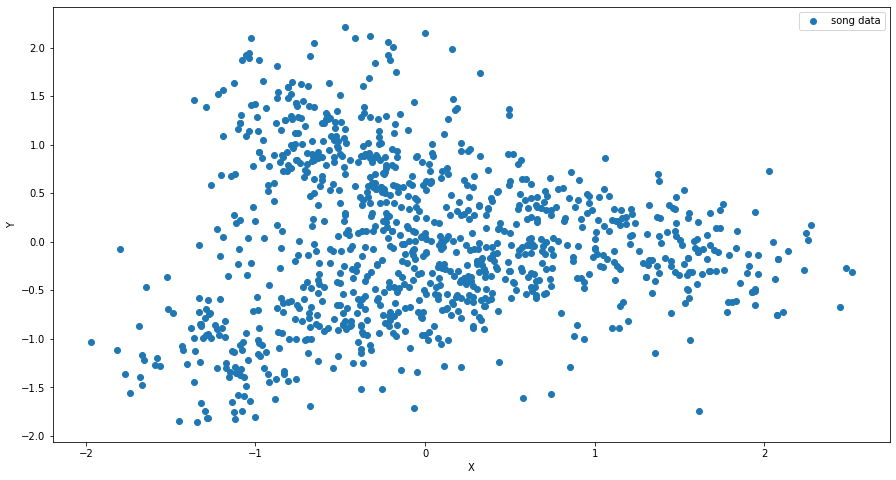

In [ ]:
# pca(2차원 축소) - 시각화
# MinMaxScaler Ver - 정규화
plt.figure(figsize=(15,8))
plt.scatter(X_PCA.iloc[:,0], X_PCA.iloc[:,1], label='song data')
plt.legend(loc = 'best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show();

### Kmeans - Kmeans++

#### 최적의 k 찾기 - elbow method

In [ ]:
# X_train_PCA 대상으로 최적의 k 찾기
#from yellowbrick.cluster import KElbowVisualizer

#model = KMeans(init='k-means++', n_clusters=10, random_state=42)
#visualizer = KElbowVisualizer(model, k=(4,40))

#visualizer.fit(X_train_PCA)        # Fit the data to the visualizer
#visualizer.show();                  # Finalize and render the figure

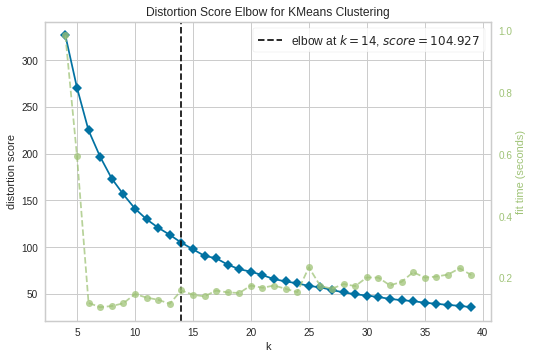

In [ ]:
# X_PCA(전체 데이터) 대상으로 최적의 k 찾기
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init='k-means++', n_clusters=10, random_state=2022)
visualizer = KElbowVisualizer(model, k=(4,40))

visualizer.fit(X_PCA)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

> - k 갯수 : 7개가 적당한 것으로 보임

#### k-평균 : 군집 수 변화에 따른 관성
- k에 따라 inertia_(군집 내 거리제곱합의 합)이 어떻게 변하는가

In [ ]:
# X_train_PCA 대상으로 k-평균 관성 계산

#n_init = 10
#max_iter = 300
#tol = 0.0001
#verbose = 0
#random_state = 2022
#algorithm = 'auto'

#kmeans_inertia = pd.DataFrame(data=[], index=range(2,21), columns=['inertia'])
#for n_clusters in range(2,21):
#    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=n_init, 
#                    max_iter=max_iter, tol=tol, verbose=verbose, random_state=random_state, algorithm=algorithm)
#    cutoff = 99
#    kmeans.fit(X_train_PCA.loc[:,0:cutoff])
#    kmeans_inertia.loc[n_clusters] = kmeans.inertia_

In [ ]:
#kmeans_inertia

In [ ]:
# X_PCA(전체 데이터) 대상으로 k-평균 관성 계산

n_init = 10
max_iter = 300
tol = 0.0001
verbose = 0
random_state = 2022
algorithm = 'auto'

kmeans_inertia_a = pd.DataFrame(data=[], index=range(2,21), columns=['inertia'])
for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=n_init, 
                    max_iter=max_iter, tol=tol, verbose=verbose, random_state=random_state, algorithm=algorithm)
    cutoff = 99
    kmeans.fit(X_PCA.loc[:,0:cutoff])
    kmeans_inertia_a.loc[n_clusters] = kmeans.inertia_

In [ ]:
kmeans_inertia_a

,inertia
2,885.338651
3,457.124208
4,326.430919
5,270.650709
6,224.933584
7,196.705651
8,173.46942
9,156.517601
10,141.350548
11,129.928174


> - k 갯수 : 10, 11개가 적당한 것으로 보임
    - 참고 사이트 : https://eunsukimme.github.io/ml/2019/12/16/K-Means/

### 클러스터링 진행
    - labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
    - cluster_centers_ : 각 군집 중심점 좌표. 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있습니다.
    - n_iter_ : 수행된 이동 횟수
> - k = 10

In [ ]:
n_clusters = 10
random_state=2022

km10 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
km10.fit(X_PCA)

KMeans(n_clusters=10, random_state=2022)

In [ ]:
# 중심점(centroids) 위치
centers10 = km10.cluster_centers_
centers10

array([[ 0.81443729,  0.24541301],
       [-0.88187181, -0.2749279 ],
       [-0.09286327,  0.76630665],
       [ 0.42631373, -0.49456157],
       [-1.21077408, -1.22270604],
       [ 1.66084385, -0.2321852 ],
       [-0.65167442,  1.5640902 ],
       [-0.74825951,  0.85448933],
       [-0.10119786,  0.00854552],
       [-0.32559463, -0.86352983]])

In [ ]:
# 군집화 결과 라벨링 기존 데이터 프레임에 새로운 컬럼으로 삽입하기
df_soundwave['cluster10'] = km10.fit_predict(X_PCA)

In [ ]:
df_soundwave.tail(3)

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster10
996,rock.00091.wav,4564.080112,1243.158267,2474.462256,508.230444,1.316006,0.984008,7773.486328,2670.117188,4754.529583,...,0.025915,0.001973,19.045689,-16.979542,-0.845949,4.901772,0.549127,0.175726,143.554688,6
997,rock.00099.wav,4006.645658,437.156737,1609.442919,649.899970,0.192579,0.581832,7601.220703,322.998047,3246.280370,...,0.306571,-0.011078,29.696540,-21.608267,1.158525,7.048834,0.793912,0.589480,123.046875,1
998,rock.00098.wav,4051.652756,527.595405,1398.672358,490.415442,3.474900,1.424331,7568.920898,495.263672,3014.740104,...,0.003739,0.211978,20.287262,-22.774876,-3.585596,6.426066,0.180473,0.278830,112.347147,1


In [ ]:
# 클러스터 레이블 확인
new_labels10 = km10.labels_

# 클러스터링 결과 각 데이터 갯수
np.unique(new_labels10, axis=0, return_counts=1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([126,  63, 107, 120,  93, 110,  74,  87, 117, 102]))

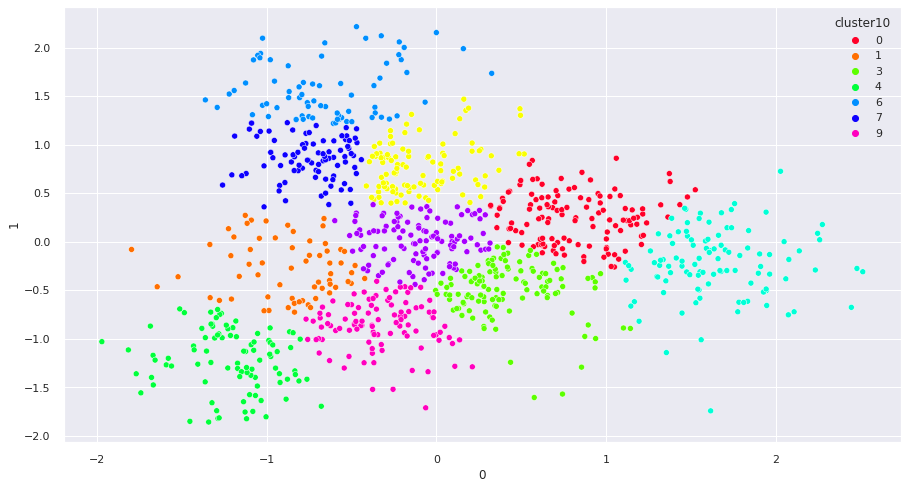

In [ ]:
# k = 10 시각화

x = X_PCA.iloc[:,0]
y = X_PCA.iloc[:,1]

sns.set(rc={"figure.figsize":(15, 8)})
sns.scatterplot(x=x, y=y, hue='cluster10', data=df_soundwave, palette='gist_rainbow');

> - k = 11

In [ ]:
n_clusters = 11
random_state=2022

km11 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
km11.fit(X_PCA)

KMeans(n_clusters=11, random_state=2022)

In [ ]:
# 중심점(centroids) 위치
centers11 = km11.cluster_centers_
centers11

array([[ 0.38895361, -0.48176254],
       [-0.7495945 ,  0.85551534],
       [ 1.26848973,  0.13512267],
       [-0.91615106, -0.29677559],
       [-1.21077408, -1.22270604],
       [-0.68809506,  1.56672854],
       [ 0.56375612,  0.26192809],
       [-0.32365135, -0.85942614],
       [-0.19499643,  0.03131641],
       [ 1.72764173, -0.38618982],
       [-0.08991076,  0.8215195 ]])

In [ ]:
# 군집화 결과 라벨링 기존 데이터 프레임에 새로운 컬럼으로 삽입하기
df_soundwave['cluster11'] = km11.fit_predict(X_PCA)

In [ ]:
df_soundwave.tail(3)

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster10,cluster11
996,rock.00091.wav,4564.080112,1243.158267,2474.462256,508.230444,1.316006,0.984008,7773.486328,2670.117188,4754.529583,...,0.001973,19.045689,-16.979542,-0.845949,4.901772,0.549127,0.175726,143.554688,6,5
997,rock.00099.wav,4006.645658,437.156737,1609.442919,649.899970,0.192579,0.581832,7601.220703,322.998047,3246.280370,...,-0.011078,29.696540,-21.608267,1.158525,7.048834,0.793912,0.589480,123.046875,1,3
998,rock.00098.wav,4051.652756,527.595405,1398.672358,490.415442,3.474900,1.424331,7568.920898,495.263672,3014.740104,...,0.211978,20.287262,-22.774876,-3.585596,6.426066,0.180473,0.278830,112.347147,1,3


In [ ]:
# 클러스터 레이블 확인
new_labels11 = km11.labels_

# 클러스터링 결과 각 데이터 갯수
np.unique(new_labels11, axis=0, return_counts=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32),
 array([122,  85,  84,  57,  93,  71,  96, 103, 109,  77, 102]))

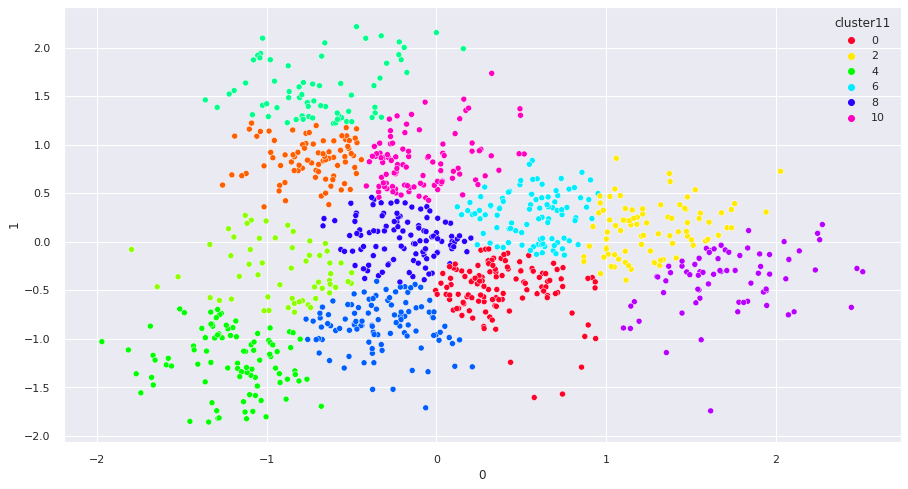

In [ ]:
# k = 11 시각화

x = X_PCA.iloc[:,0]
y = X_PCA.iloc[:,1]

sns.set(rc={"figure.figsize":(15, 8)})
sns.scatterplot(x=x, y=y, hue='cluster11', data=df_soundwave, palette='gist_rainbow');

In [ ]:
# 데이터프레임에서 컬럼명 삭제하기
#df_soundwave.drop(['cluster12','cluster13','cluster14','cluster15'], axis=1, inplace=True)

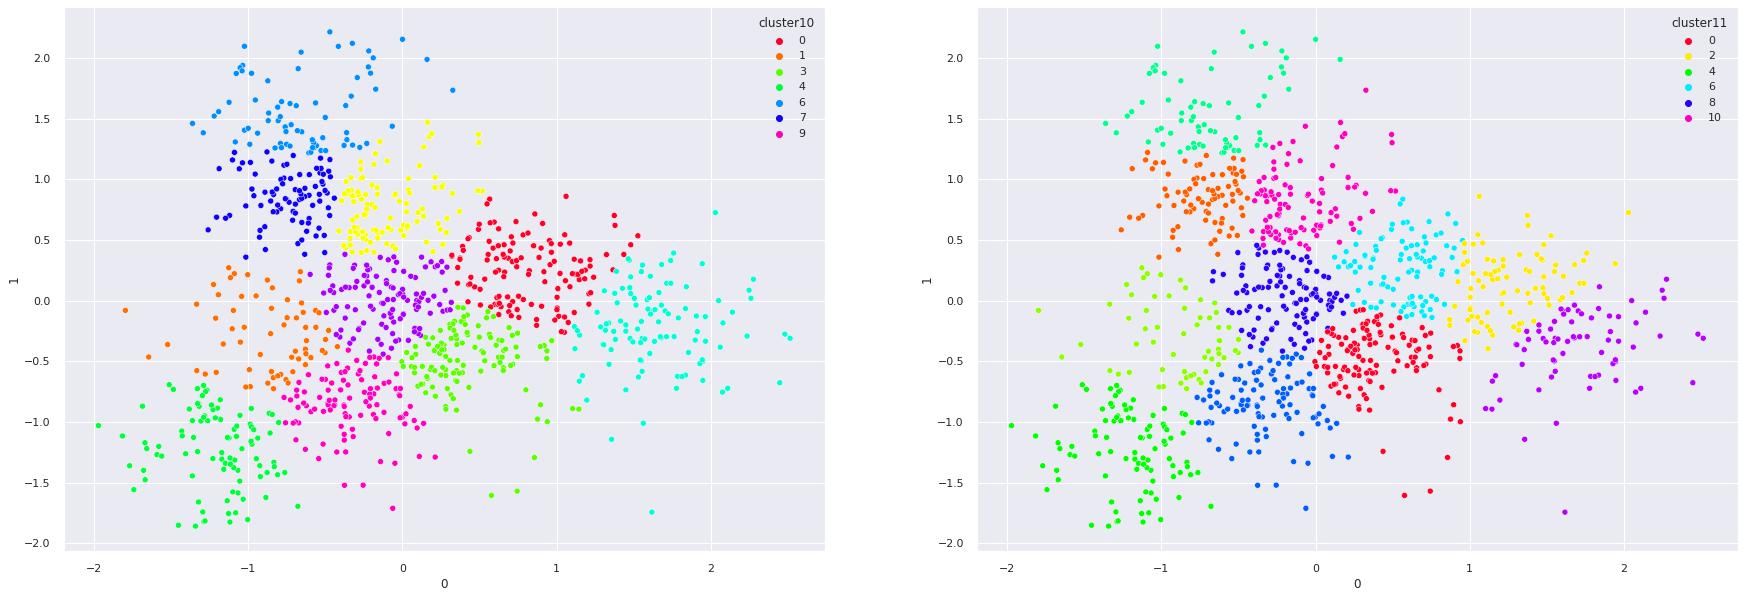

In [38]:
# 결과값 비교하기 (시각화 그래프 활용)
fig, ax = plt.subplots(ncols=2, figsize=(30,10))

sns.scatterplot(x=x, y=y, hue='cluster10', data=df_soundwave, palette='gist_rainbow', ax=ax[0])
#plt.scatter(centers10[:, 2], centers10[:, 3], c='red', alpha=0.5, s=150)

sns.scatterplot(x=x, y=y, hue='cluster11', data=df_soundwave, palette='gist_rainbow', ax=ax[1]);
#plt.scatter(centers11[:, 2], centers11[:, 3], c='red', alpha=0.5, s=150)

- 정확도 계산
    - 실루엣 점수
        - 모든 데이터에 대한 실루엣 계수의 평균
        - `(b-a) / max(a,b)`
            - a는 동일한 클러스터 내 다른 데이터와 자기 자신 데이터와의 평균 거리입니다(클러스터 내부의 평균 거리). 
            - b는 자기가 속한 클러스터를 제외하고 가장 가까운 클러스터의 데이터까지 평균 거리입니다. 계수는 −1에서 1까지 바뀔 수 있습니다. 
> - `+1`에 가까우면 b 즉 다른 클러스터와 멀면서, a 자기가 속한 클러스터 내 데이터들과 가깝고 `잘 뭉쳐져있다`는 뜻이고, `−1`에 가깝다면, 반대이기 때문에 `잘못된 클러스터에 할당`되었다는 의미입니다.

In [39]:
from sklearn.metrics import silhouette_score

silhouette_score(X_PCA, km10.labels_)

0.3566979096826247

In [40]:
silhouette_score(X_PCA, km11.labels_)

0.34430897967427854

> - 정확도 높지 않음 

- 참고 사이트
    - 비지도 학습_군집 : https://subinium.github.io/MLwithPython-3-5/
    - kmeans 코드 : https://todayisbetterthanyesterday.tistory.com/60
    - kmeans 설명 : https://hanawithdata.tistory.com/entry/K-means-Clustering-with-Python
    - kmeans 정확도 검사 : https://box-world.tistory.com/62

### 클러스터링 된 노래 목록 비교해보기

In [41]:
df_soundwave

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster10,cluster11
0,blues.00000.wav,4031.364538,1027.079258,1784.420446,360.263361,5.246790,1.537974,7644.287109,1830.322266,3806.485316,...,0.492951,32.866340,-23.219631,1.219928,6.853561,0.534537,0.258880,123.046875,7,8
1,blues.00002.wav,4669.770713,417.254802,1552.481958,395.634070,11.609763,1.930126,6556.860352,441.430664,3040.514948,...,0.675960,16.524359,-29.785427,-2.226821,5.529573,0.976377,-0.080558,161.499023,8,8
2,blues.00003.wav,3236.442116,318.713500,1070.119953,429.532791,1.803354,1.001449,7611.987305,387.597656,2185.028454,...,-0.124392,16.595015,-21.426250,-3.408233,5.654808,0.880601,0.255001,172.265625,8,8
3,blues.00004.wav,4464.156642,849.658285,1835.494603,585.961468,1.536058,1.049734,7084.423828,1152.026367,3580.945013,...,-0.042242,4.889854,-41.730530,-11.703781,7.432079,0.651141,-0.701559,135.999178,8,8
4,blues.00010.wav,3202.187008,436.072310,1410.469096,453.302918,0.489085,0.669760,6707.592773,516.796875,2767.274933,...,-0.062250,20.802301,-29.235157,-4.986113,6.826524,1.310209,0.176304,161.499023,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,rock.00095.wav,4493.780095,928.102055,2008.581132,531.170411,2.519661,1.284807,7902.685547,1894.921875,4254.215942,...,-0.538604,21.106041,-22.082030,-1.189238,7.068684,0.069182,-0.018390,103.359375,7,1
995,rock.00094.wav,3958.563217,1727.080720,2629.346944,306.122150,0.889462,0.539890,7192.089844,3908.276367,5086.735908,...,0.455727,20.615631,-16.877655,2.251966,6.207781,-0.194352,0.089831,112.347147,6,5
996,rock.00091.wav,4564.080112,1243.158267,2474.462256,508.230444,1.316006,0.984008,7773.486328,2670.117188,4754.529583,...,0.001973,19.045689,-16.979542,-0.845949,4.901772,0.549127,0.175726,143.554688,6,5
997,rock.00099.wav,4006.645658,437.156737,1609.442919,649.899970,0.192579,0.581832,7601.220703,322.998047,3246.280370,...,-0.011078,29.696540,-21.608267,1.158525,7.048834,0.793912,0.589480,123.046875,1,3


In [46]:
# 클러스터링 결과 인덱스로 찾기
print(df_soundwave.index[df_soundwave['cluster11'] == 8].tolist())

[0, 1, 2, 3, 9, 26, 57, 61, 62, 64, 80, 94, 95, 97, 99, 149, 204, 211, 219, 243, 245, 248, 251, 255, 260, 261, 265, 267, 273, 278, 281, 285, 288, 290, 291, 292, 293, 294, 296, 297, 299, 309, 328, 335, 340, 353, 360, 367, 375, 376, 377, 379, 380, 381, 411, 478, 489, 495, 498, 527, 551, 561, 569, 575, 576, 577, 578, 582, 584, 653, 655, 671, 684, 713, 799, 800, 803, 806, 821, 826, 827, 832, 875, 895, 901, 902, 905, 908, 909, 910, 911, 913, 914, 917, 923, 939, 945, 947, 958, 959, 966, 974, 975, 982, 983, 987, 988, 989, 993]


In [53]:
# 인덱스 값 검색하기
df_soundwave.iloc[821]

song                reggae.00015.wav
centroid_max              5173.05076
centroid_min               399.35808
centroid_mean            1923.622473
centroid_std               814.68692
                          ...       
mfcc_19_kurtosis            1.712272
mfcc_19_skew                0.632312
tempo                     129.199219
cluster10                          8
cluster11                          8
Name: 821, Length: 196, dtype: object

### csv 파일 저장

In [56]:
df_clustered = df_soundwave[['song', 'cluster10', 'cluster11']]

In [57]:
df_clustered

,song,cluster10,cluster11
0,blues.00000.wav,7,8
1,blues.00002.wav,8,8
2,blues.00003.wav,8,8
3,blues.00004.wav,8,8
4,blues.00010.wav,3,0
...,...,...,...
994,rock.00095.wav,7,1
995,rock.00094.wav,6,5
996,rock.00091.wav,6,5
997,rock.00099.wav,1,3


In [58]:
# export the data
filename = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
df_clustered.to_csv(f'/content/drive/Othercomputers/내 노트북/Project/Models/Music_Genre_Classification_Recommendation/Clustering_Result_csv/{filename}.csv')